# Assess the impact of the pandemic on the city-bike usage

## Import pre-processed subset of data

In [90]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv("./data/fullsubset.csv")
data.head()

,STATION.ID,TIME,LAST.UPDATED,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,BIKE.USAGE,hour
0,8,2018-08-01 12:30:02,2018-08-01 12:19:01,CUSTOM HOUSE QUAY,30,0,30,Open,Custom House Quay,53.347885,-6.248048,0,2018-08-01 12:00:00
1,67,2018-08-01 12:30:02,2018-08-01 12:28:00,THE POINT,40,12,28,Open,The Point,53.346867,-6.230852,-2,2018-08-01 12:00:00
2,69,2018-08-01 12:30:02,2018-08-01 12:27:19,GRAND CANAL DOCK,40,1,39,Open,Grand Canal Dock,53.342636,-6.238695,11,2018-08-01 12:00:00
3,8,2018-08-01 12:35:02,2018-08-01 12:29:11,CUSTOM HOUSE QUAY,30,0,30,Open,Custom House Quay,53.347885,-6.248048,-9,2018-08-01 12:00:00
4,67,2018-08-01 12:35:02,2018-08-01 12:28:00,THE POINT,40,12,28,Open,The Point,53.346867,-6.230852,-2,2018-08-01 12:00:00


## Convert to date time 

In [91]:
# need to convert the 'TIME' column to a datetime data type using pandas
data['TIME'] = pd.to_datetime(data['TIME'])

# group the data by half-hour intervals based on the 'TIME' and 'NAME' columns
data = data.groupby([pd.Grouper(key='TIME', freq='30min'), 'NAME']).mean()


# reset the index to turn the group keys into columns
data = data.reset_index()

# print
data

,TIME,NAME,STATION.ID,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,LATITUDE,LONGITUDE,BIKE.USAGE,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,WORKING_DAY,Percentage_Bikes_In_Use
0,2018-08-01 12:30:00,CUSTOM HOUSE QUAY,8.0,30.0,0.333333,29.666667,53.347885,-6.248048,-7.833333,2018.0,8.0,1.0,12.0,2.0,1.0,1.111111
1,2018-08-01 12:30:00,GRAND CANAL DOCK,69.0,40.0,1.000000,39.000000,53.342636,-6.238695,11.166667,2018.0,8.0,1.0,12.0,2.0,1.0,2.500000
2,2018-08-01 12:30:00,THE POINT,67.0,40.0,12.166667,27.833333,53.346867,-6.230852,-1.833333,2018.0,8.0,1.0,12.0,2.0,1.0,30.416667
3,2018-08-01 13:00:00,CUSTOM HOUSE QUAY,8.0,30.0,0.000000,30.000000,53.347885,-6.248048,-9.000000,2018.0,8.0,1.0,13.0,2.0,1.0,0.000000
4,2018-08-01 13:00:00,GRAND CANAL DOCK,69.0,40.0,0.833333,39.166667,53.342636,-6.238695,10.166667,2018.0,8.0,1.0,13.0,2.0,1.0,2.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135947,2021-12-31 23:00:00,GRAND CANAL DOCK,69.0,40.0,14.000000,26.000000,53.342636,-6.238695,2.000000,2021.0,12.0,31.0,23.0,4.0,1.0,35.000000
135948,2021-12-31 23:00:00,THE POINT,67.0,40.0,16.000000,24.000000,53.346867,-6.230852,19.000000,2021.0,12.0,31.0,23.0,4.0,1.0,40.000000
135949,2021-12-31 23:30:00,CUSTOM HOUSE QUAY,8.0,30.0,26.000000,4.000000,53.347885,-6.248048,-22.666667,2021.0,12.0,31.0,23.0,4.0,1.0,86.666667
135950,2021-12-31 23:30:00,GRAND CANAL DOCK,69.0,40.0,13.166667,26.833333,53.342636,-6.238695,3.166667,2021.0,12.0,31.0,23.0,4.0,1.0,32.916667


In [96]:
# Convert the TIME column to datetime format
#data['TIME'] = pd.to_datetime(data['TIME'])

# Extract Year, Month, Day, Hour, and Day of the Week
data['YEAR'] = data['TIME'].dt.year
data['MONTH'] = data['TIME'].dt.month
data['DAY'] = data['TIME'].dt.day
data['HOUR'] = data['TIME'].dt.hour
data['DAY_OF_WEEK'] = data['TIME'].dt.dayofweek

# 1 if the corresponding day of the week (Monday-Friday) is less than 5 (i.e., Monday to Friday)
# 0 if it is 5 or 6 (i.e., Saturday or Sunday).
data['WORKING_DAY'] = data['DAY_OF_WEEK'].apply(lambda x: 1 if x < 5 else 0)

data = data[data.YEAR != 2022]

data

,TIME,NAME,STATION.ID,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,LATITUDE,LONGITUDE,BIKE.USAGE,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,WORKING_DAY,Percentage_Bikes_In_Use
0,2018-08-01 12:30:00,CUSTOM HOUSE QUAY,8.0,30.0,0.333333,29.666667,53.347885,-6.248048,-7.833333,2018,8,1,12,2,1,1.111111
1,2018-08-01 12:30:00,GRAND CANAL DOCK,69.0,40.0,1.000000,39.000000,53.342636,-6.238695,11.166667,2018,8,1,12,2,1,2.500000
2,2018-08-01 12:30:00,THE POINT,67.0,40.0,12.166667,27.833333,53.346867,-6.230852,-1.833333,2018,8,1,12,2,1,30.416667
3,2018-08-01 13:00:00,CUSTOM HOUSE QUAY,8.0,30.0,0.000000,30.000000,53.347885,-6.248048,-9.000000,2018,8,1,13,2,1,0.000000
4,2018-08-01 13:00:00,GRAND CANAL DOCK,69.0,40.0,0.833333,39.166667,53.342636,-6.238695,10.166667,2018,8,1,13,2,1,2.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135947,2021-12-31 23:00:00,GRAND CANAL DOCK,69.0,40.0,14.000000,26.000000,53.342636,-6.238695,2.000000,2021,12,31,23,4,1,35.000000
135948,2021-12-31 23:00:00,THE POINT,67.0,40.0,16.000000,24.000000,53.346867,-6.230852,19.000000,2021,12,31,23,4,1,40.000000
135949,2021-12-31 23:30:00,CUSTOM HOUSE QUAY,8.0,30.0,26.000000,4.000000,53.347885,-6.248048,-22.666667,2021,12,31,23,4,1,86.666667
135950,2021-12-31 23:30:00,GRAND CANAL DOCK,69.0,40.0,13.166667,26.833333,53.342636,-6.238695,3.166667,2021,12,31,23,4,1,32.916667


Interestingly, seasonality doesn't seem to affect bike usage too much when averaged across the four years.

[Text(0.5, 1.0, 'Count of bikes during different months')]

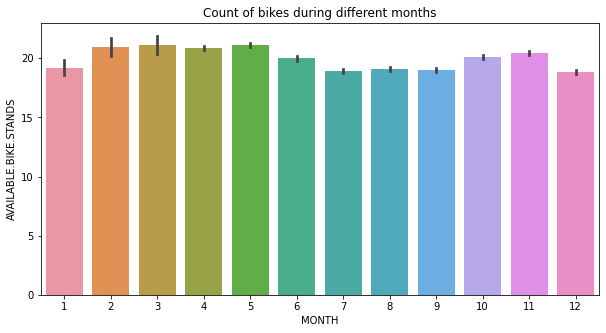

In [117]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=data, x='MONTH', y='AVAILABLE.BIKE.STANDS', ax=ax)
ax.set(title='Count of bikes in use during different months')

[Text(0.5, 1.0, 'Count of bikes in use during different months by year')]

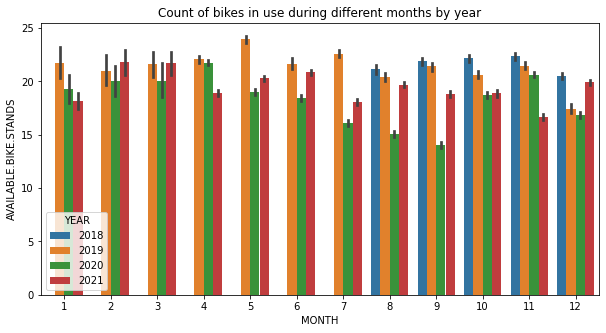

In [118]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=data, x='MONTH', y='AVAILABLE.BIKE.STANDS', hue = 'YEAR', ax=ax)
ax.set(title='Count of bikes in use during different months by year')

We can see in this plot separated by year that demand for bikes doesn't becessarily decrease as drastically overall in the pandemic years. Easing of lockdowns over the summer might explain the downward slope in 2020, as people who were comfortable moving around might have opted for public transport or driving once they were allowed, and then returned to bikes when lockdown was reintroduced. 2021 usage is not quite at pre-pandemic levels however it seems to follow the overall pattern/non-pattern to a certain extent.

[Text(0.5, 1.0, 'Count of bikes over the week')]

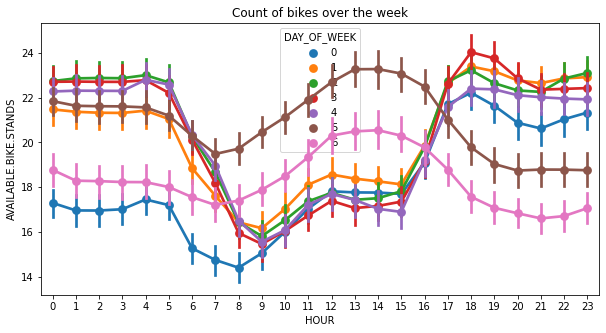

In [108]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=data, x='HOUR', y='AVAILABLE.BIKE.STANDS', hue='DAY_OF_WEEK', ax=ax)
ax.set(title='Count of bikes in use over the week')

As we can see in this plot, the weekdays seem to have a similar trajectory, but it's hard to fully distinguish between them and the weekends as this is averaged across the 4 (very different) years. So, we must separate the plots by year:

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends 2020')]

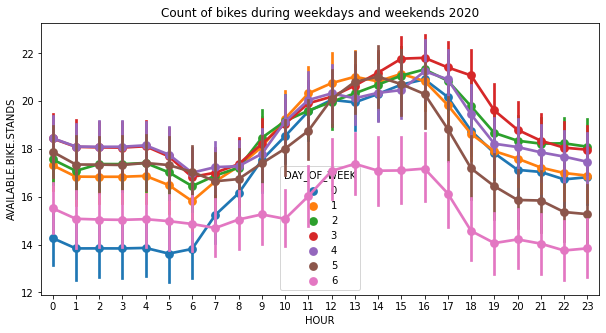

In [107]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=data[data['YEAR']==2020], x='HOUR', y='AVAILABLE.BIKE.STANDS', hue='DAY_OF_WEEK', ax=ax)
ax.set(title='Count of bikes in use during weekdays and weekends 2020')

In 2020, weekday demand for bikes seemed to follow a daily pattern akin to the regular weekend pattern. This makes sense as many workplaces were closed so rush hours were no longer relevant in the same way. What's interesting and unexpected in that closeness to weekend patterns is that bike usage didn't fall off completely, despite extensive lockdowns, and bike usage began to resemble (albeit at a lower volume) the trend of leisure days. It might be helpful to examine both the pre-pandemic and the 2021 data, as this is averaged across 2020, 2.5 months at the start of which were not considered part of the pandemic.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends, pre-2020')]

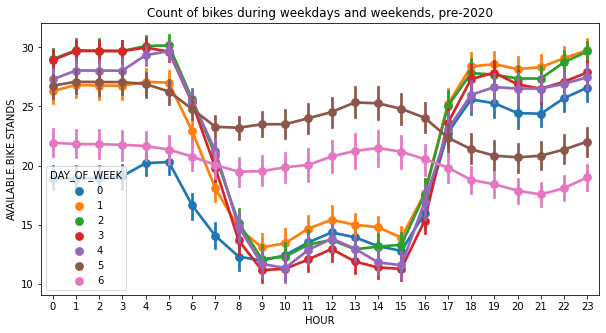

In [106]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=data[data['YEAR']<2020], x='HOUR', y='AVAILABLE.BIKE.STANDS', hue='DAY_OF_WEEK', ax=ax)
ax.set(title='Count of bikes in use during weekdays and weekends, pre-2020')

Through this visualisation of pre-pandemic data, we can clearly assess the difference that the pandemic caused to bike usage. Note the early-morning/late-night usage which dramatically decreases in the 2020/21 plots and even in the first plot averaged across all years. There is a lull between the hours of 9 and 3 - typical work or school hours, indicating that before the pandemic people used Dublin bikes to get to work or school, and home, and also in free hours. This clear pattern that assimilates to the regular working day was clearly disrupted by the pandemic.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends 2021')]

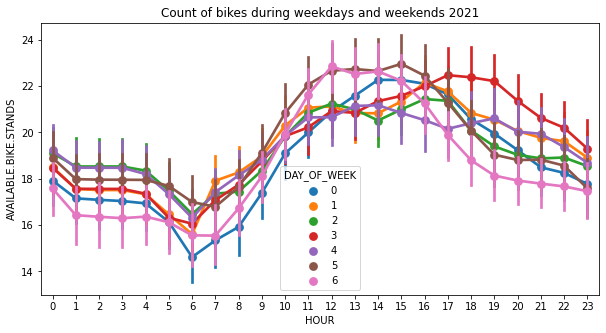

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=data[data['YEAR']==2021], x='HOUR', y='AVAILABLE.BIKE.STANDS', hue='DAY_OF_WEEK', ax=ax)
ax.set(title='Count of bikes in use during weekdays and weekends 2021')

In 2021, overall usage started to increase, however the weekday pattern is once again clearly missing. This can potentially be explained by the extensive lockdowns in 2021, employed by a more experienced government.

The following plot demonstrates just how different the usage of bikes across the weekday was impacted by the onset of the pandemic in 2020 and 2021:

[Text(0.5, 1.0, 'Count of bikes during weekdays')]

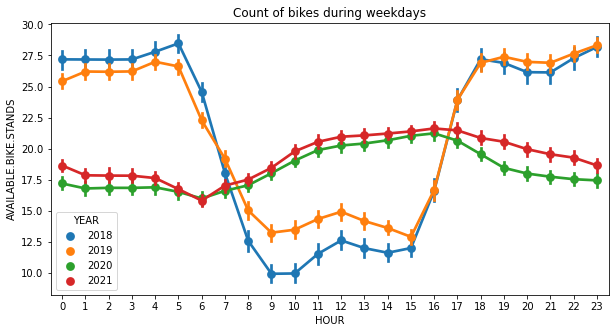

In [88]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=data[data['DAY_OF_WEEK']<5], x='HOUR', y='AVAILABLE.BIKE.STANDS', hue = 'YEAR',ax=ax)
ax.set(title='Count of bikes in use during weekdays')

In contrast, the weekend pattern of usage stayed mostly the same, though overall usage dropped. In 2021, we observe people travelling by bike a lot more in the middle of the weekend day, but falling off overnight again.

[Text(0.5, 1.0, 'Count of bikes during weekends')]

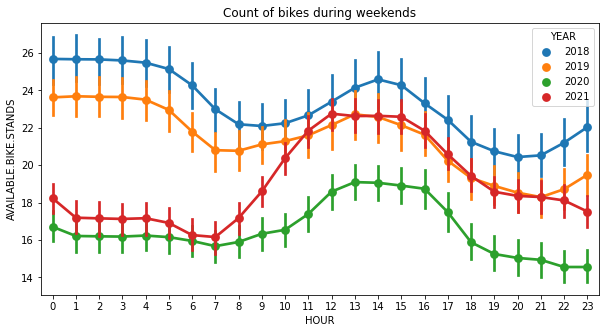

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=data[data['DAY_OF_WEEK']>4], x='HOUR', y='AVAILABLE.BIKE.STANDS', hue = 'YEAR',ax=ax)
ax.set(title='Count of bikes in use during weekends')

This plots help us visualise and assess the impact of the pandemic on usage of Dublin Bikes. Though overall demand might have decreased slightly, it didn't decrease as dramatically as one might expect. However, upon inspection of the hourly trend, we can see that when users used the bikes shifted, and became indiscernible from weekend patterns, albeit at a lower usage level. 